In [30]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
os.environ.setdefault('GLUE_SETTINGS_MODULE', 'settings')

'settings'

In [3]:
import net_classify
from flowfairy.conf import settings

In [4]:
batch_size = settings.BATCH_SIZE
samplerate = settings.SAMPLERATE

In [5]:
x = tf.placeholder(tf.float32, [batch_size, samplerate])
cls = tf.placeholder(tf.int32, [batch_size])

In [6]:
with tf.variable_scope('network'):
    net = net_classify.conv_net(x, cls, None)

conv1:  Tensor("network/MaxPool2D/MaxPool:0", shape=(64, 5512, 1, 4), dtype=float32)
embedded: Tensor("network/embedding/concat:0", shape=(64, 5512, 1, 5), dtype=float32)
conv2:  Tensor("network/MaxPool2D_1/MaxPool:0", shape=(64, 2756, 1, 16), dtype=float32)
conv3:  Tensor("network/mul_2:0", shape=(64, 2756, 1, 16), dtype=float32)
d2sp:  Tensor("network/DepthToSpace:0", shape=(64, 11024, 4, 1), dtype=float32)
conv4:  Tensor("network/mul_3:0", shape=(64, 11024, 1, 16), dtype=float32)
conv5:  Tensor("network/mul_4:0", shape=(64, 11024, 1, 256), dtype=float32)
out:  Tensor("network/Reshape_2:0", shape=(64, 11024, 256), dtype=float32)


In [7]:
saver = tf.train.Saver()

In [8]:
sess = tf.InteractiveSession()

In [43]:
saver.restore(sess, tf.train.latest_checkpoint('logs'))

INFO:tensorflow:Restoring parameters from /home/s123859/flowfairy/examples/sine_fix/logs/GLU_norm_noact_clip_causal_dropoutf.ckpt-3000


In [44]:
coll = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
c1uw = coll[0]

In [45]:
def plot_filter(var, flt):
    plt.plot(var.eval()[:,0,0,flt])

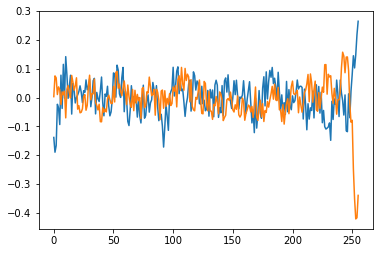

In [48]:
#plot_filter(c1uw, 0)
#plot_filter(c1uw, 1)
plot_filter(c1uw, 2)
plot_filter(c1uw, 3)
plt.show()

In [50]:
for v in coll:
    print(v)

<tf.Variable 'network/conv1_unit/weights:0' shape=(256, 1, 1, 4) dtype=float32_ref>
<tf.Variable 'network/conv1_unit/BatchNorm/beta:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'network/conv1_gate/weights:0' shape=(256, 1, 1, 4) dtype=float32_ref>
<tf.Variable 'network/conv1_gate/BatchNorm/beta:0' shape=(4,) dtype=float32_ref>
<tf.Variable 'network/embedding/embedding_1:0' shape=(200, 1) dtype=float32_ref>
<tf.Variable 'network/conv2_unit/weights:0' shape=(128, 1, 5, 16) dtype=float32_ref>
<tf.Variable 'network/conv2_unit/biases:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'network/conv2_gate/weights:0' shape=(128, 1, 5, 16) dtype=float32_ref>
<tf.Variable 'network/conv2_gate/biases:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'network/conv3_unit/weights:0' shape=(128, 1, 16, 16) dtype=float32_ref>
<tf.Variable 'network/conv3_unit/biases:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'network/conv3_gate/weights:0' shape=(128, 1, 16, 16) dtype=float32_ref>
<tf.Variable 'network/con

Tensor("strided_slice_3:0", shape=(200,), dtype=float32)


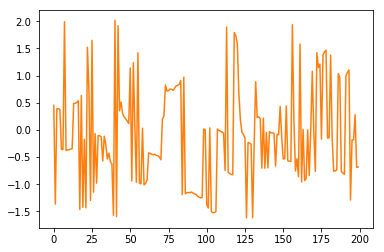

In [55]:
embedding = coll[4][:,0]
print(embedding)
plt.plot(embedding.eval())
plt.show()